# Lead Conversion

## Import Dataset

In [1]:
import pandas as pd

leads = pd.read_csv('Leads.csv')
leads.head()

/home/sourish/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sourish/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit          ...           \
0                            0                   0.0          ...            
1                          674                   2.5          ...            
2                         1532                   2.0          ...            
3                          305                   1.0          ...            
4                         1428                   1.0          ...            

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

### Split X and y

In [2]:
y = leads.iloc[:,6]
X = leads.drop(columns=['Prospect ID', 'Lead Number', 'How did you hear about X Education', 'Converted', 'Tags', 'Lead Quality', 'Lead Profile', 
                        'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'])

## Data Preprocessing

### Replace values

In [3]:
import numpy as np
from preprocessing import replace_yn

## Replace Yes/No with 1/0
X = replace_yn(X)

## Replace Select with NaN
X = X.replace(to_replace='Select', value=np.nan)

## Merge Similar Labels
X['Lead Source'] = X['Lead Source'].replace('google', 'Google')
X['Lead Source'] = X['Lead Source'].replace(['blog', 'WeLearn', 'welearnblog_Home'], 'Blog')

### Display Number of NaN values

In [4]:
X.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

### Label Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## Find the categorical values
categorical_feature_mask = X.dtypes==object
categorical_cols = X.columns[categorical_feature_mask].tolist()

## Label Encode categorical values
mask = X.isnull()
df = X.astype(str)
le_X = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(lambda col: le_X.fit_transform(col))
X = df.where(~mask, X)

### Fill missing values using KNN

In [6]:
from fancyimpute import KNN, IterativeImputer

X = KNN(k=3).fit_transform(X)
# X = IterativeImputer().fit_transform(X)

/home/sourish/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sourish/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Imputing row 1/9240 with 3 missing, elapsed time: 18.634
Imputing row 101/9240 with 2 missing, elapsed time: 18.643
Imputing row 201/9240 with 0 missing, elapsed time: 18.654
Imputing row 301/9240 with 5 missing, elapsed time: 18.666
Imputing row 401/9240 with 0 missing, elapsed time: 18.679
Imputing row 501/9240 with 0 missing, elapsed time: 18.690
Imputing row 601/9240 with 1 missing, elapsed time: 18.702
Imputing row 701/9240 with 0 missing, elapsed time: 18.715
Imputing row 801/9240 with 2 missing, elapsed time: 18.725
Imputing row 901/9240 with 0 missing, elapsed time: 18.736
Imputing row 1001/9240 with 0 missing, elapsed time: 18.746
Imputing row 1101/9240 with 5 missing, elapsed time: 18.755
Imputing row 1201/9240 with 0 missing, elapsed time: 18.768
Imputing row 1301/9240 with 0 missing, elapsed time: 18.780
Imputing row 1401/9240 with 0 missing, elapsed time: 18.789
Imputing row 1501/9240 with 0 missing, elapsed time: 18.796
Imputing row 1601/9240 with 0 missing, elapsed time:

### OneHot Encode categorical values

In [7]:
onehotencoder = OneHotEncoder(categorical_features = categorical_feature_mask, sparse=False)
X = onehotencoder.fit_transform(X)

## Visualization

### Heat Map for correlation among attributes

/home/sourish/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


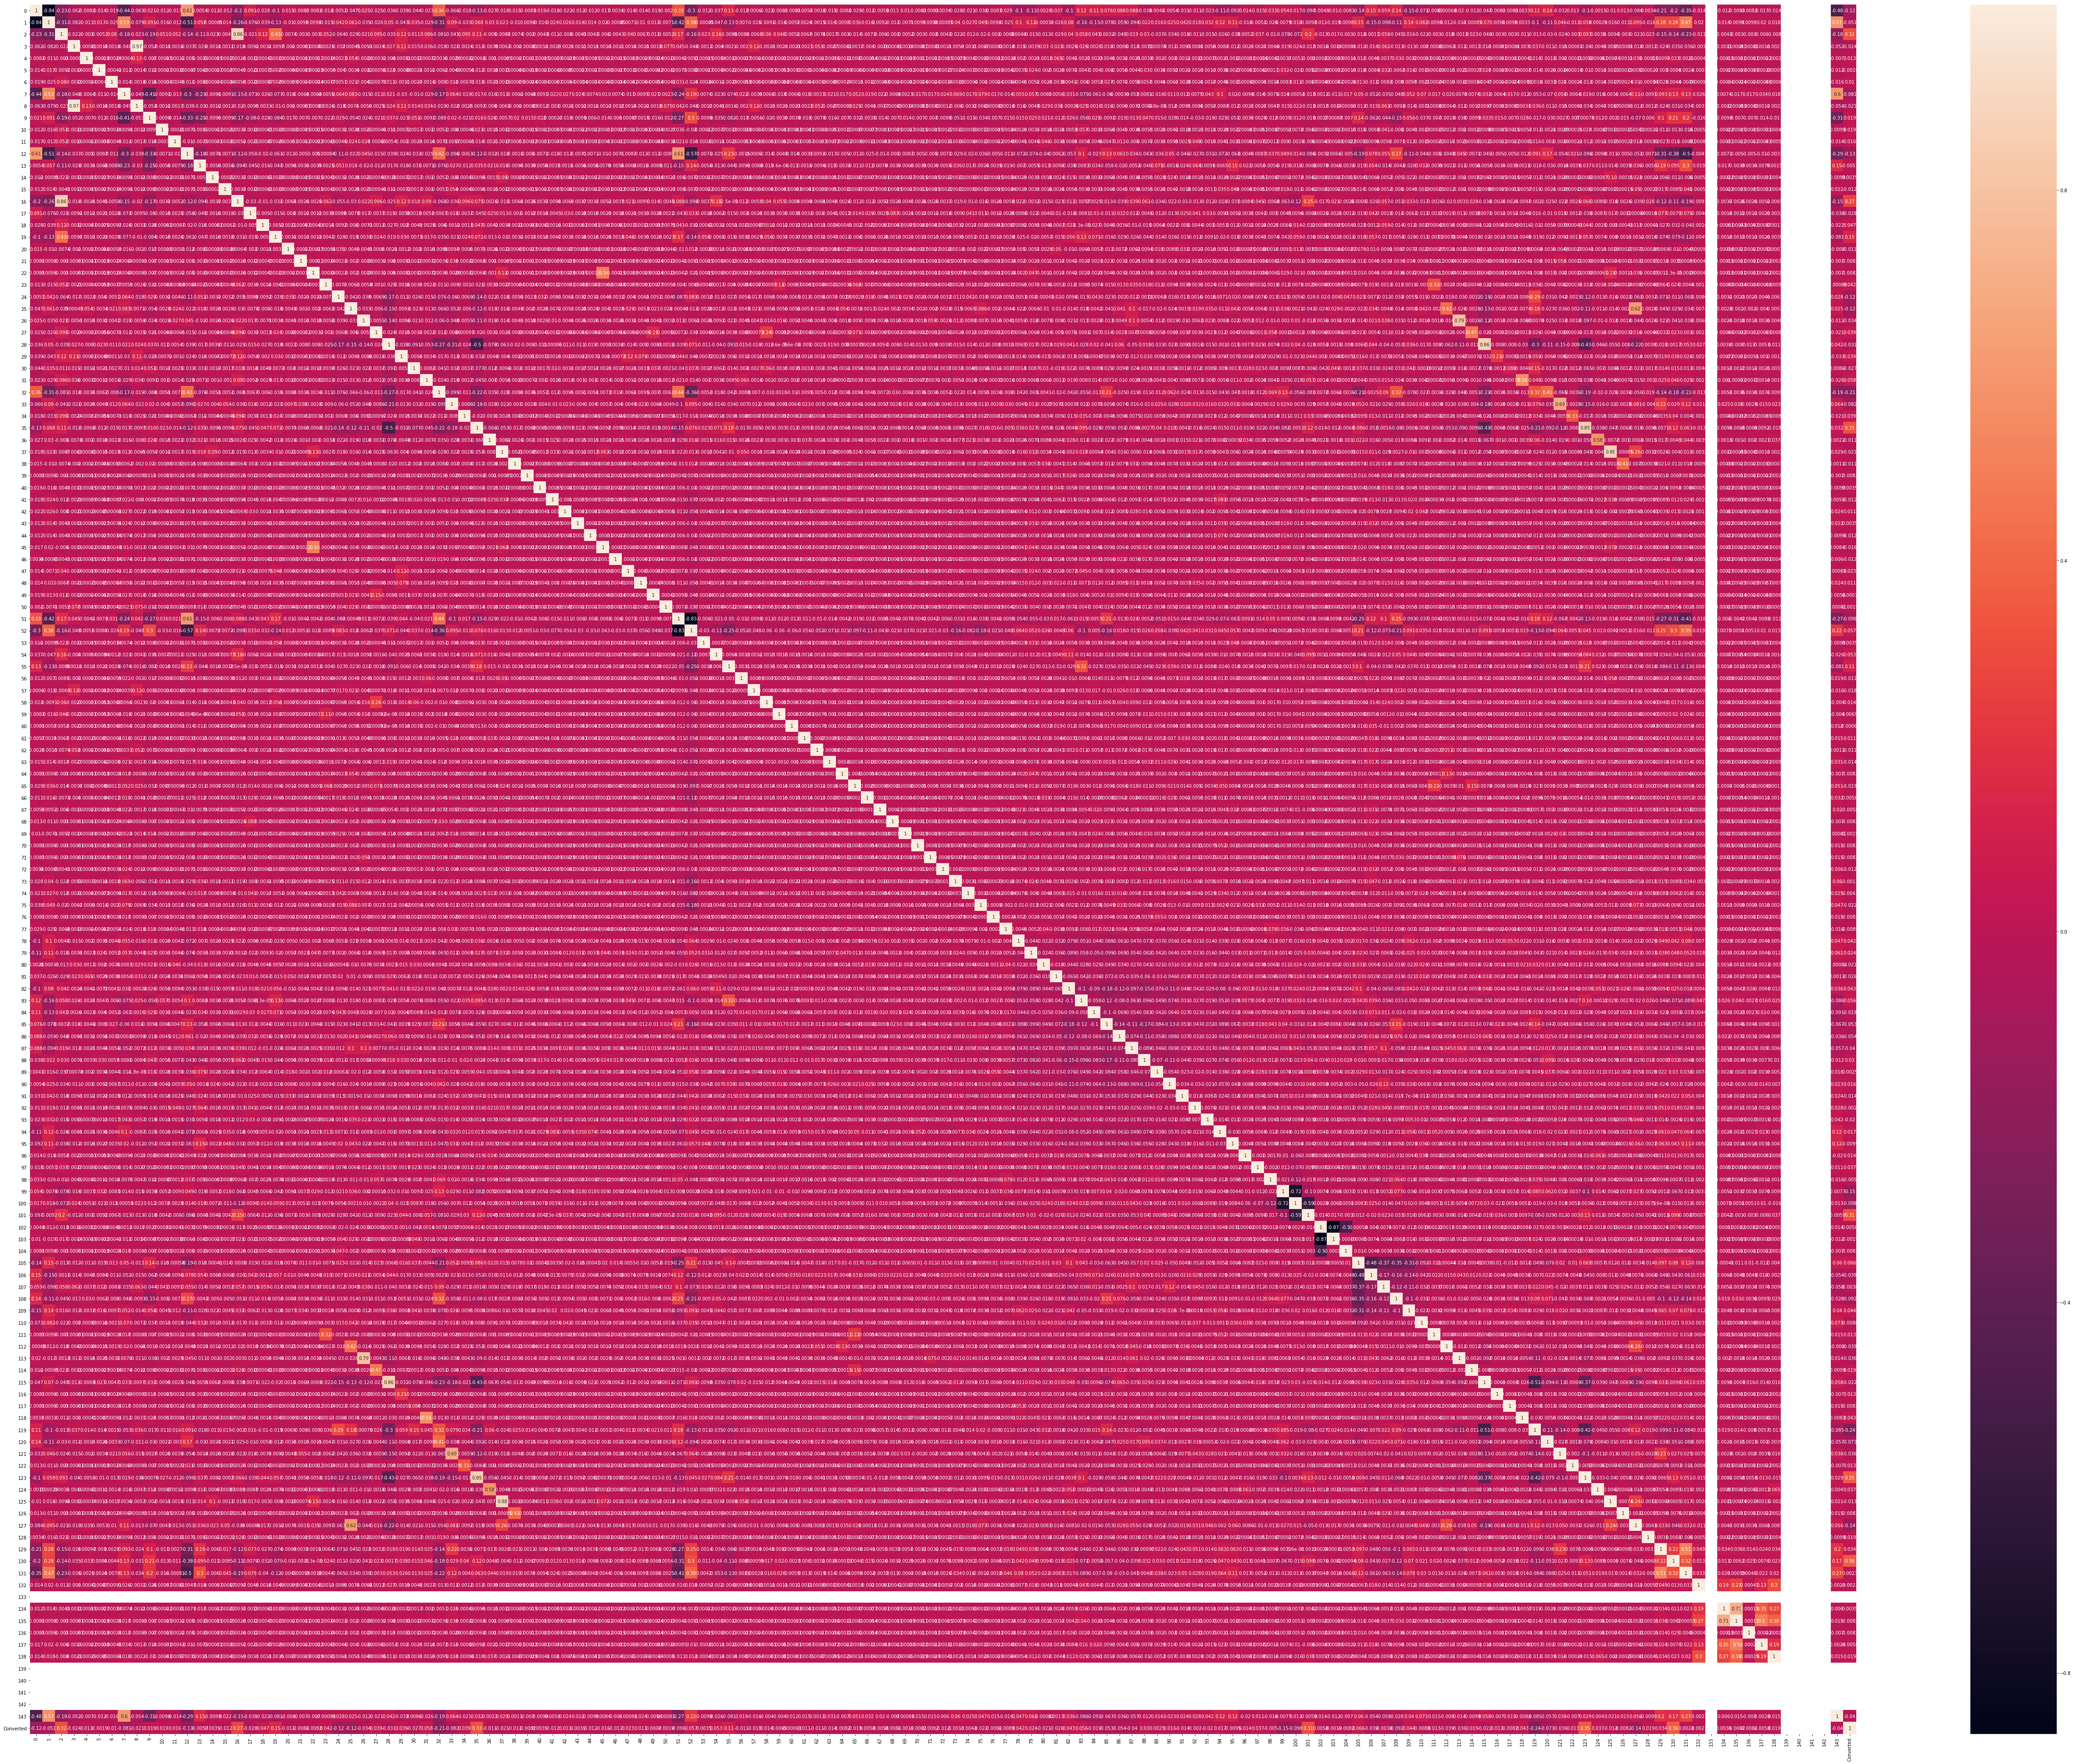

In [8]:
temp_X = pd.DataFrame(X)
temp_y = pd.DataFrame(y)
temp = pd.concat([temp_X, temp_y], axis=1)

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
corrmat = temp.corr()
top_corr_features = corrmat.index

## Plot heat map
plt.figure(figsize=(90,70))
g=sns.heatmap(temp[top_corr_features].corr(), annot=True)

### Delete columns with least correlation with "Converted"

In [9]:
X = np.delete(X, [0, 7, 12, 24, 25, 32, 51, 86, 99, 119, 127], axis=1)

### Feature Importance

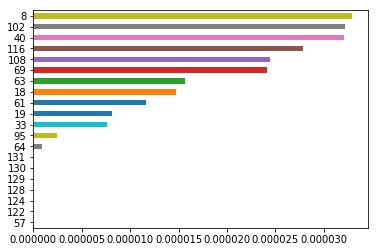

In [10]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

## Plot graph of feature importances
feat_importances = pd.Series(model.feature_importances_)
feat_importances.nsmallest(20).plot(kind='barh')
plt.show()

### Delete column with least feature importance

In [11]:
# X = np.delete(X, [71, 68, 47, 15, 39, 10, 22, 64, 70, 46, 50, 104, 21], axis=1)

## Split Training and Testing Data

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

## Training

In [13]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

In [14]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Testing

In [15]:
pred = classifier.predict(X_test)

### Classification Report

In [16]:
from sklearn.metrics import classification_report
print(classification_report(pred, y_test))

             precision    recall  f1-score   support

          0       0.88      0.81      0.85      1215
          1       0.69      0.79      0.74       633

avg / total       0.82      0.81      0.81      1848

